In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsbombpy import sb
import mplsoccer
from mplsoccer import VerticalPitch,Pitch
import adjustText

In [41]:
pd.set_option('display.max.columns',200)

In [5]:
#EURO Matches
Euro2024Matches = sb.matches(competition_id = 55, season_id = 282)

In [29]:
#Spain Matches
Matches = Euro2024Matches[(Euro2024Matches['home_team'] == 'Spain') | (Euro2024Matches['away_team']=='Spain')]

In [33]:
match_ids = Matches.match_id.tolist()

In [34]:
match_ids

[3943043, 3942752, 3942226, 3941018, 3930179, 3930172, 3930160]

In [36]:
all_events = []
for match_id in match_ids:
    event = sb.events(match_id)
    all_events.append(event)
df = pd.concat(all_events)

In [38]:
df.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,miscontrol_aerial_won,bad_behaviour_card,ball_recovery_offensive,dribble_no_touch,pass_deflected,goalkeeper_shot_saved_off_target,shot_saved_off_target,foul_committed_penalty,foul_won_penalty,shot_redirect
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.player.value_counts()

player
Fabián Ruiz Peña                1457
Aymeric Laporte                 1417
Rodrigo Hernández Cascante      1373
Marc Cucurella Saseta           1149
Robin Aime Robert Le Normand    1045
                                ... 
Olivier Giroud                    14
Ernest Muçi                       10
Ivan Toney                         4
Nico Schlotterbeck                 1
Deniz Undav                        1
Name: count, Length: 135, dtype: int64

In [48]:
df['type'].value_counts()

type
Pass                 7459
Ball Receipt*        7134
Carry                6247
Pressure             2397
Ball Recovery         584
Duel                  427
Block                 285
Goal Keeper           239
Clearance             229
Dribble               209
Shot                  198
Foul Committed        193
Foul Won              186
Miscontrol            147
Dispossessed          143
Dribbled Past         112
Interception          110
Substitution           66
50/50                  46
Injury Stoppage        42
Half Start             32
Half End               32
Tactical Shift         21
Referee Ball-Drop      17
Starting XI            14
Shield                  7
Bad Behaviour           7
Player Off              6
Player On               6
Error                   4
Offside                 3
Own Goal Against        2
Own Goal For            2
Name: count, dtype: int64

In [88]:
Spain_df = df[(df['possession_team'] == 'Spain') & (df['type'] == 'Pass')][['type','location','pass_end_location','pass_recipient','player','timestamp', 'match_id']]  


In [89]:
Spain_df[['x','y']] = Spain_df['location'].apply(pd.Series)
Spain_df[['end_x','end_y']] = Spain_df['pass_end_location'].apply(pd.Series)

In [90]:
Spain_df.drop(columns = {'location','pass_end_location'}, inplace=True)

In [91]:
Spain_df.head()

,type,pass_recipient,player,timestamp,match_id,x,y,end_x,end_y
8,Pass,Robin Aime Robert Le Normand,Unai Simón Mendibil,00:00:34.440,3943043,6.9,39.6,9.1,57.2
9,Pass,Daniel Carvajal Ramos,Robin Aime Robert Le Normand,00:00:36.279,3943043,8.9,57.2,20.6,75.8
10,Pass,Daniel Olmo Carvajal,Daniel Carvajal Ramos,00:00:39.436,3943043,28.6,76.4,50.2,68.5
11,Pass,Lamine Yamal Nasraoui Ebana,Álvaro Borja Morata Martín,00:00:41.878,3943043,61.9,67.1,65.1,66.9
12,Pass,Daniel Olmo Carvajal,Daniel Carvajal Ramos,00:00:56.844,3943043,72.5,80.0,70.4,73.3


In [102]:
FabRuizdf = Spain_df[Spain_df['pass_recipient'] == 'Fabián Ruiz Peña']

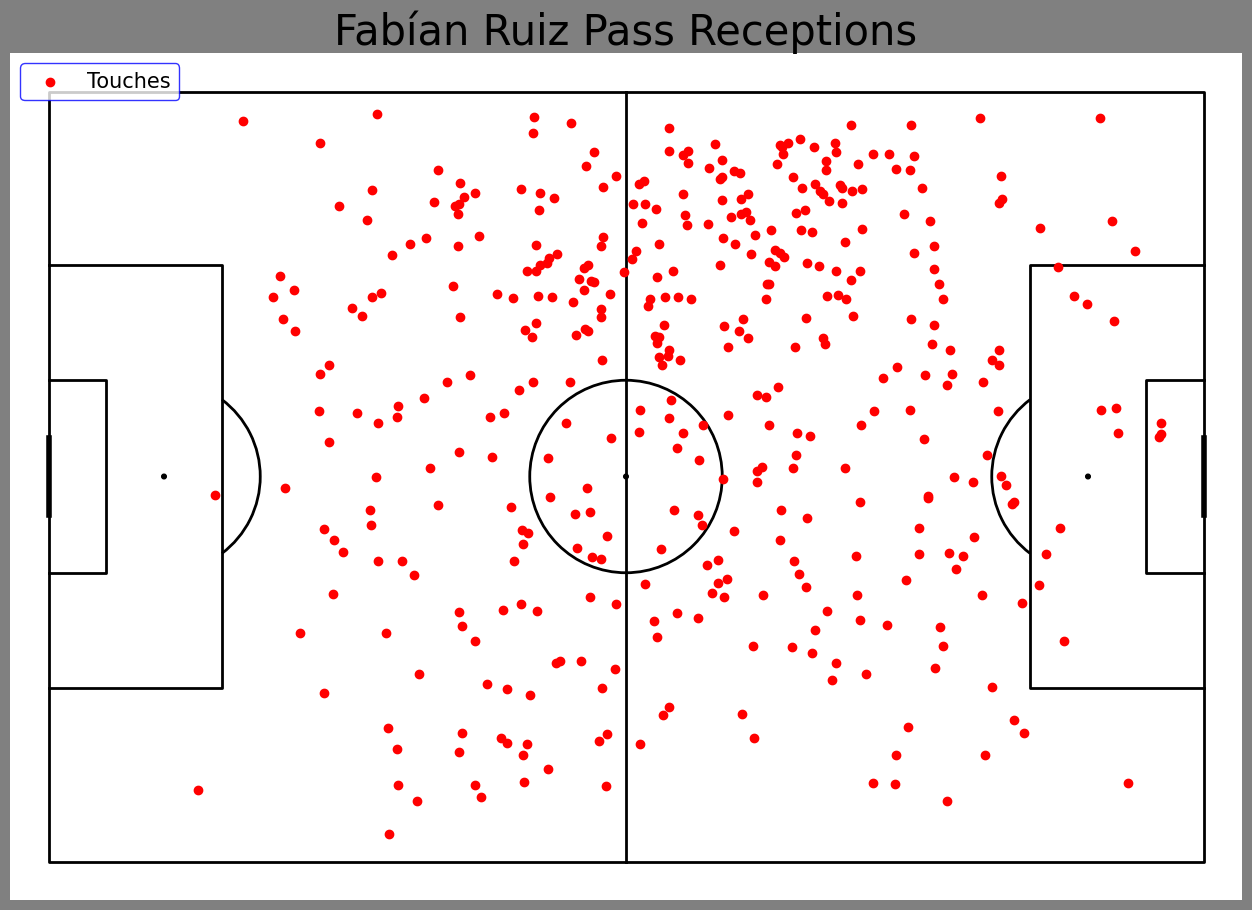

In [103]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('grey')



pitch.scatter(FabRuizdf.end_x, FabRuizdf.end_y,  color='red', ax=ax, zorder=2, label = "Touches")

#plot the legend
ax.legend(facecolor='white', handlelength=2, edgecolor='Blue', fontsize=15, loc='upper left')

#set title of viz
ax_title = ax.set_title('Fabían Ruiz Pass Receptions', fontsize=30,color='black')

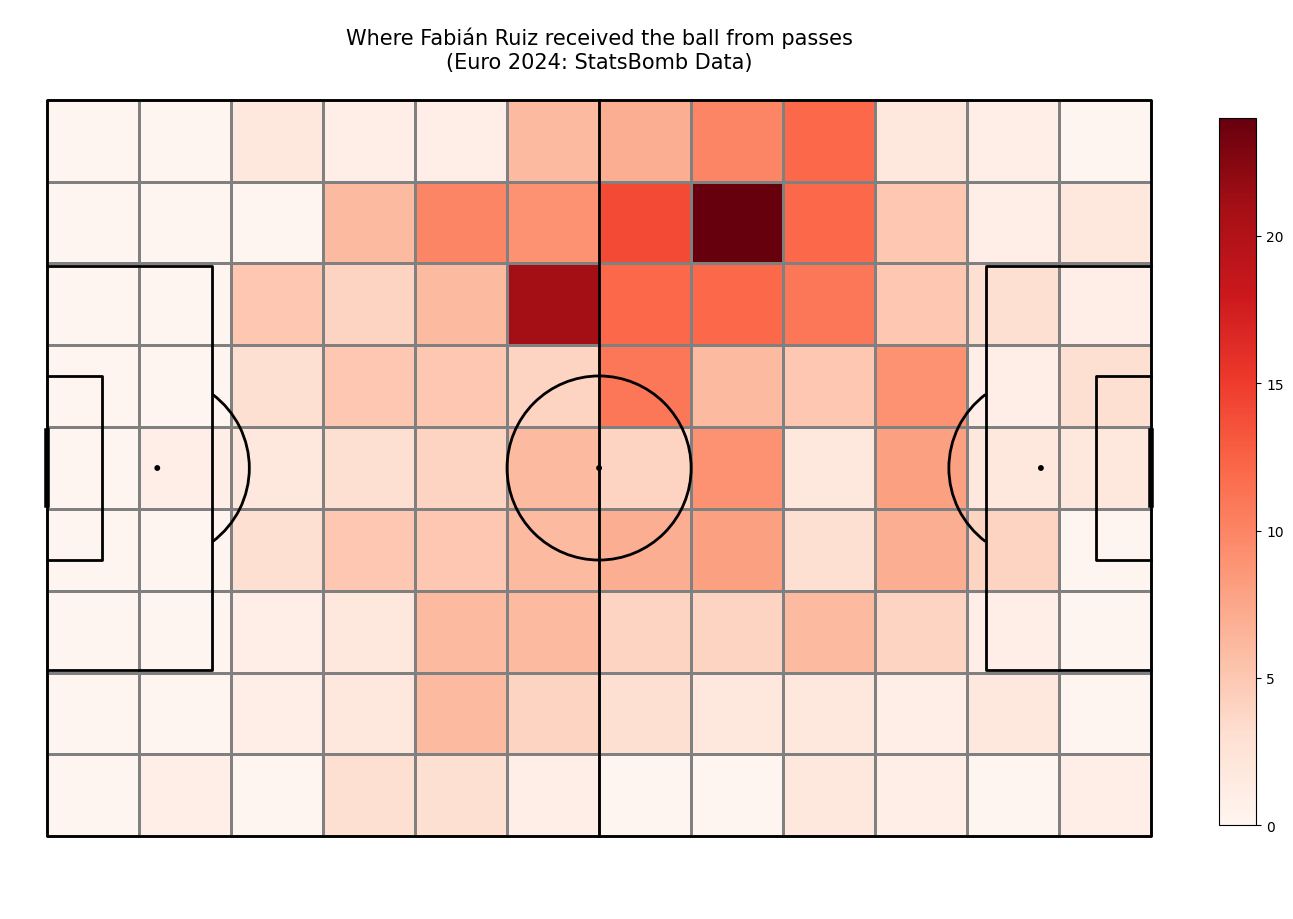

In [108]:
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram
bin_statistic = pitch.bin_statistic(FabRuizdf.end_x, FabRuizdf.end_y, statistic='count', bins=(12, 9), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])

#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Where Fabián Ruiz received the ball from passes\n(Euro 2024: StatsBomb Data)', fontsize = 15)

plt.savefig('plot1.pdf')
plt.show()


In [ ]:
#Part 1: Done
#Part 2: • Get Minutes Played of all Players as a df
#• Get the main position of those players and isolate central and defensive midfielders (comparable players to Fabián Ruiz)
#• Combine data frame 
# • Get statistics (Pass attempted under Pressure per 90 and Pass Accuracy under Pressure %)
# • Standerdize (z-score)
# • Plot

In [119]:
from football_utils import get_minutes_played4, get_all_minutes_by_match

/opt/anaconda3/envs/spyder-5.4.3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [126]:
Minutes_Played = get_all_minutes_by_match(match_ids = Euro2024Matches.match_id.tolist() ,get_minutes_played_func=get_minutes_played4 )

100%|███████████████████████████████████████████| 51/51 [01:21<00:00,  1.60s/it]


In [131]:
match_ids = Euro2024Matches.match_id.tolist()

In [132]:
all_events = []
for match_id in match_ids:
    event = sb.events(match_id)
    all_events.append(event)
df = pd.concat(all_events)

In [161]:
Main_Position = pd.DataFrame((df.groupby(['player','position','player_id']).size())).reset_index().sort_values(['player','position','player_id']).sort_values(0,ascending=False).groupby('player').head(1).drop(columns = 0)

In [171]:
Main_Position.head()

,player,position,player_id
198,Declan Rice,Left Defensive Midfield,3943.0
933,Toni Kroos,Left Defensive Midfield,5574.0
91,Aymeric Laporte,Left Center Back,4353.0
580,Marc Guehi,Left Center Back,34526.0
906,Theo Bernard François Hernández,Left Back,6704.0


In [158]:
Minutes_Played['90s'] = Minutes_Played['total_minutes'] / 90 

In [173]:
Minutes_Played.head()

,player_id,player_name,team,total_minutes,90s
0,2954.0,Youri Tielemans,Belgium,159.514617,1.772385
1,2972.0,Marcus Thuram,France,276.619383,3.073549
2,2988.0,Memphis Depay,Netherlands,478.053967,5.311711
3,3009.0,Kylian Mbappé Lottin,France,489.319750,5.436886
4,3026.0,Adrien Rabiot,France,388.159800,4.312887


In [174]:
df_joined = pd.merge(Minutes_Played, Main_Position.rename(columns = {'player':'player_name'}))

In [175]:
df_joined.head()

,player_id,player_name,team,total_minutes,90s,position
0,2954.0,Youri Tielemans,Belgium,159.514617,1.772385,Right Defensive Midfield
1,2972.0,Marcus Thuram,France,276.619383,3.073549,Center Forward
2,2988.0,Memphis Depay,Netherlands,478.053967,5.311711,Center Forward
3,3009.0,Kylian Mbappé Lottin,France,489.319750,5.436886,Left Wing
4,3026.0,Adrien Rabiot,France,388.159800,4.312887,Left Center Midfield


In [ ]:
#get number of passes completed by each player

In [178]:
df.head()

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_penalty,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_technique,goalkeeper_type,id,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure,ball_recovery_recovery_failure,block_offensive,dribble_nutmeg,dribble_overrun,foul_committed_offensive,pass_inswinging,pass_no_touch,shot_one_on_one,clearance_other,foul_committed_type,miscontrol_aerial_won,goalkeeper_shot_saved_to_post,pass_straight,shot_open_goal,shot_saved_to_post,goalkeeper_success_in_play,ball_recovery_offensive,dribble_no_touch,pass_miscommunication,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_shot_saved_off_target,shot_follows_dribble,shot_saved_off_target,shot_redirect
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d7c4f4a8-77b9-40c5-8d81-f50b40355723,1,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Netherlands,941,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e518d7a6-3360-4d94-aeef-661709bddf42,2,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fb2e0f15-aa3c-4a06-a11b-f16ae5804342,3,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,[75fd7777-ef15-4fdc-abb1-1349fef334c1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75fd7777-ef15-4fdc-abb1-1349fef334c1,4,NaN,NaN,NaN,3942819,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,1,Netherlands,941,[fb2e0f15-aa3c-4a06-a11b-f16ae5804342],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Engla

In [182]:
df[df['type'] == 'Pass'].groupby(['player','player_id'])['pass_outcome'].value_counts()

player               player_id  pass_outcome
Abdülkerim Bardakcı  48383.0    Incomplete      23
                                Out              5
                                Pass Offside     1
                                Unknown          1
Adam Buksa           7663.0     Incomplete       1
                                                ..
Žan Celar            24109.0    Incomplete       3
Žan Karničnik        137487.0   Incomplete      36
                                Pass Offside     3
                                Out              2
Žan Vipotnik         290289.0   Incomplete       2
Name: count, Length: 1090, dtype: int64

In [246]:
Pressured_Passes = df[(df['type'] == 'Pass') & (df['under_pressure'] == True)]

In [247]:
Pressured_Passes[['match_id','player_id','player','pass_outcome']].head()

,match_id,player_id,player,pass_outcome
7,3942819,3468.0,Jordan Pickford,Incomplete
32,3942819,3205.0,Kyle Walker,NaN
36,3942819,30714.0,Jude Bellingham,NaN
55,3942819,10955.0,Harry Kane,Incomplete
57,3942819,37274.0,Bart Verbruggen,NaN


In [248]:
Pressured_Passes['pass_completed'] =  False
Pressured_Passes['pass_completed'] = Pressured_Passes['pass_completed'].mask(Pressured_Passes.pass_outcome.isna(), True)

/var/folders/4j/7b46k2ln1593bnqn_pvk1hvh0000gn/T/ipykernel_22537/1471327113.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Pressured_Passes['pass_completed'] =  False
/var/folders/4j/7b46k2ln1593bnqn_pvk1hvh0000gn/T/ipykernel_22537/1471327113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pressured_Passes['pass_completed'] =  False
/var/folders/4j/7b46k2ln1593bnqn_pvk1hvh0000gn/T/ipykernel_22537/1471327113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [249]:
Pressured_Pass_df = pd.DataFrame(Pressured_Passes.groupby(['player_id','player','pass_completed']).size()).unstack('pass_completed')[0].sort_values(True, ascending = False)

In [250]:
Pressured_Pass_df.fillna(0,inplace=True)

In [251]:
Pressured_Pass_df['PP Rate']=(Pressured_Pass_df[True]/(Pressured_Pass_df[True] + Pressured_Pass_df[False]))*100

In [252]:
Pressured_Pass_df.head()

,pass_completed,False,True,PP Rate
player_id,player,,,
6765.0,Rodrigo Hernández Cascante,9.0,72.0,88.888889
5574.0,Toni Kroos,7.0,66.0,90.410959
3943.0,Declan Rice,10.0,65.0,86.666667
6655.0,Fabián Ruiz Peña,9.0,64.0,87.671233
3500.0,Granit Xhaka,10.0,55.0,84.615385


In [275]:
Pressured_Pass_df_filter = pd.merge(Pressured_Pass_df.reset_index(),Main_Position)

In [276]:
Pressured_Pass_df_filter.head()

,player_id,player,False,True,PP Rate,position
0,6765.0,Rodrigo Hernández Cascante,9.0,72.0,88.888889,Right Defensive Midfield
1,5574.0,Toni Kroos,7.0,66.0,90.410959,Left Defensive Midfield
2,3943.0,Declan Rice,10.0,65.0,86.666667,Left Defensive Midfield
3,6655.0,Fabián Ruiz Peña,9.0,64.0,87.671233,Left Defensive Midfield
4,3500.0,Granit Xhaka,10.0,55.0,84.615385,Left Defensive Midfield


In [277]:
Pressured_Pass_df_filter[Pressured_Pass_df_filter.position.isin(['Right Defensive Midfield', 'Left Defensive Midfield','Center Defensive Midfield',
                                        'Right Center Midfield','Left Center Midfield'])]

,player_id,player,False,True,PP Rate,position
0,6765.0,Rodrigo Hernández Cascante,9.0,72.0,88.888889,Right Defensive Midfield
1,5574.0,Toni Kroos,7.0,66.0,90.410959,Left Defensive Midfield
2,3943.0,Declan Rice,10.0,65.0,86.666667,Left Defensive Midfield
3,6655.0,Fabián Ruiz Peña,9.0,64.0,87.671233,Left Defensive Midfield
4,3500.0,Granit Xhaka,10.0,55.0,84.615385,Left Defensive Midfield
...,...,...,...,...,...,...
444,7982.0,Taras Wiktorowicz Romanczuk,0.0,1.0,100.000000,Center Defensive Midfield
445,5527.0,Thomas Delaney,6.0,1.0,14.285714,Left Defensive Midfield
448,4286.0,Callum Styles,2.0,0.0,0.000000,Left Defensive Midfield
453,10285.0,Stuart Armstrong,2.0,0.0,0.000000,Left Center Midfield


In [278]:
Pressured_Pass_df_filter = pd.merge(Pressured_Pass_df_filter[Pressured_Pass_df_filter.position.isin(['Right Defensive Midfield', 'Left Defensive Midfield','Center Defensive Midfield',
                                        'Right Center Midfield','Left Center Midfield'])],Minutes_Played.rename(columns = {'player':'player_name'})).drop(columns = ['player_name','total_minutes'])

In [279]:
Pressured_Pass_df_filter.head()

,player_id,player,False,True,PP Rate,position,team,90s
0,6765.0,Rodrigo Hernández Cascante,9.0,72.0,88.888889,Right Defensive Midfield,Spain,6.226902
1,5574.0,Toni Kroos,7.0,66.0,90.410959,Left Defensive Midfield,Germany,5.676417
2,3943.0,Declan Rice,10.0,65.0,86.666667,Left Defensive Midfield,England,8.187242
3,6655.0,Fabián Ruiz Peña,9.0,64.0,87.671233,Left Defensive Midfield,Spain,6.436586
4,3500.0,Granit Xhaka,10.0,55.0,84.615385,Left Defensive Midfield,Switzerland,5.683495


In [280]:
Pressured_Pass_df_filter['PP Completed per 90'] = Pressured_Pass_df_filter[True]/Pressured_Pass_df_filter['90s']
Pressured_Pass_df_filter['PP per 90'] = (Pressured_Pass_df_filter[True] + Pressured_Pass_df_filter[False]) /Pressured_Pass_df_filter['90s']
Pressured_Pass_df_filter

,player_id,player,False,True,PP Rate,position,team,90s,PP Completed per 90,PP per 90
0,6765.0,Rodrigo Hernández Cascante,9.0,72.0,88.888889,Right Defensive Midfield,Spain,6.226902,11.562732,13.008074
1,5574.0,Toni Kroos,7.0,66.0,90.410959,Left Defensive Midfield,Germany,5.676417,11.627052,12.860225
2,3943.0,Declan Rice,10.0,65.0,86.666667,Left Defensive Midfield,England,8.187242,7.939181,9.160594
3,6655.0,Fabián Ruiz Peña,9.0,64.0,87.671233,Left Defensive Midfield,Spain,6.436586,9.943159,11.341416
4,3500.0,Granit Xhaka,10.0,55.0,84.615385,Left Defensive Midfield,Switzerland,5.683495,9.677145,11.436626
...,...,...,...,...,...,...,...,...,...,...
95,7982.0,Taras Wiktorowicz Romanczuk,0.0,1.0,100.000000,Center Defensive Midfield,Poland,0.619677,1.613743,1.613743
96,5527.0,Thomas Delaney,6.0,1.0,14.285714,Left Defensive Midfield,Denmark,1.100400,0.908761,6.361324
97,4286.0,Callum Styles,2.0,0.0,0.000000,Left Defensive Midfield,Hungary,0.684137,0.000000,2.923389
98,10285.0,Stuart Armstrong,2.0,0.0,0.000000,Left Center Midfield,Scotland,0.286212,0.000000,6.987817


In [281]:

Pressured_Pass_df_filter['PP_Rate_zscore'] = (Pressured_Pass_df_filter['PP Rate'] - Pressured_Pass_df_filter['PP Rate'].mean()) / Pressured_Pass_df_filter['PP Rate'].std()
Pressured_Pass_df_filter['PP per 90 _zscore'] = (Pressured_Pass_df_filter['PP per 90'] - Pressured_Pass_df_filter['PP per 90'].mean()) / Pressured_Pass_df_filter['PP per 90'].std()

In [262]:
Pressured_Pass_df_filter.head()

,player_id,player,False,True,PP Rate,position,team,90s,PP Completed per 90,PP per 90,PP_Rate_zscore,PP per 90 _zscore
0,6765.0,Rodrigo Hernández Cascante,9.0,72.0,88.888889,Right Defensive Midfield,Spain,6.226902,11.562732,13.008074,0.573087,1.407764
1,5574.0,Toni Kroos,7.0,66.0,90.410959,Left Defensive Midfield,Germany,5.676417,11.627052,12.860225,0.646907,1.368300
2,3943.0,Declan Rice,10.0,65.0,86.666667,Left Defensive Midfield,England,8.187242,7.939181,9.160594,0.465311,0.380808
3,6655.0,Fabián Ruiz Peña,9.0,64.0,87.671233,Left Defensive Midfield,Spain,6.436586,9.943159,11.341416,0.514032,0.962905
4,3500.0,Granit Xhaka,10.0,55.0,84.615385,Left Defensive Midfield,Switzerland,5.683495,9.677145,11.436626,0.365826,0.988318


In [286]:
Pressured_Pass_df_filter = Pressured_Pass_df_filter[Pressured_Pass_df_filter[False] + Pressured_Pass_df_filter[True]>20]


In [290]:
Pressured_Pass_df_filter.head()

,player_id,player,False,True,PP Rate,position,team,90s,PP Completed per 90,PP per 90,PP_Rate_zscore,PP per 90 _zscore
0,6765.0,Rodrigo Hernández Cascante,9.0,72.0,88.888889,Right Defensive Midfield,Spain,6.226902,11.562732,13.008074,0.573087,1.407764
1,5574.0,Toni Kroos,7.0,66.0,90.410959,Left Defensive Midfield,Germany,5.676417,11.627052,12.860225,0.646907,1.368300
2,3943.0,Declan Rice,10.0,65.0,86.666667,Left Defensive Midfield,England,8.187242,7.939181,9.160594,0.465311,0.380808
3,6655.0,Fabián Ruiz Peña,9.0,64.0,87.671233,Left Defensive Midfield,Spain,6.436586,9.943159,11.341416,0.514032,0.962905
4,3500.0,Granit Xhaka,10.0,55.0,84.615385,Left Defensive Midfield,Switzerland,5.683495,9.677145,11.436626,0.365826,0.988318


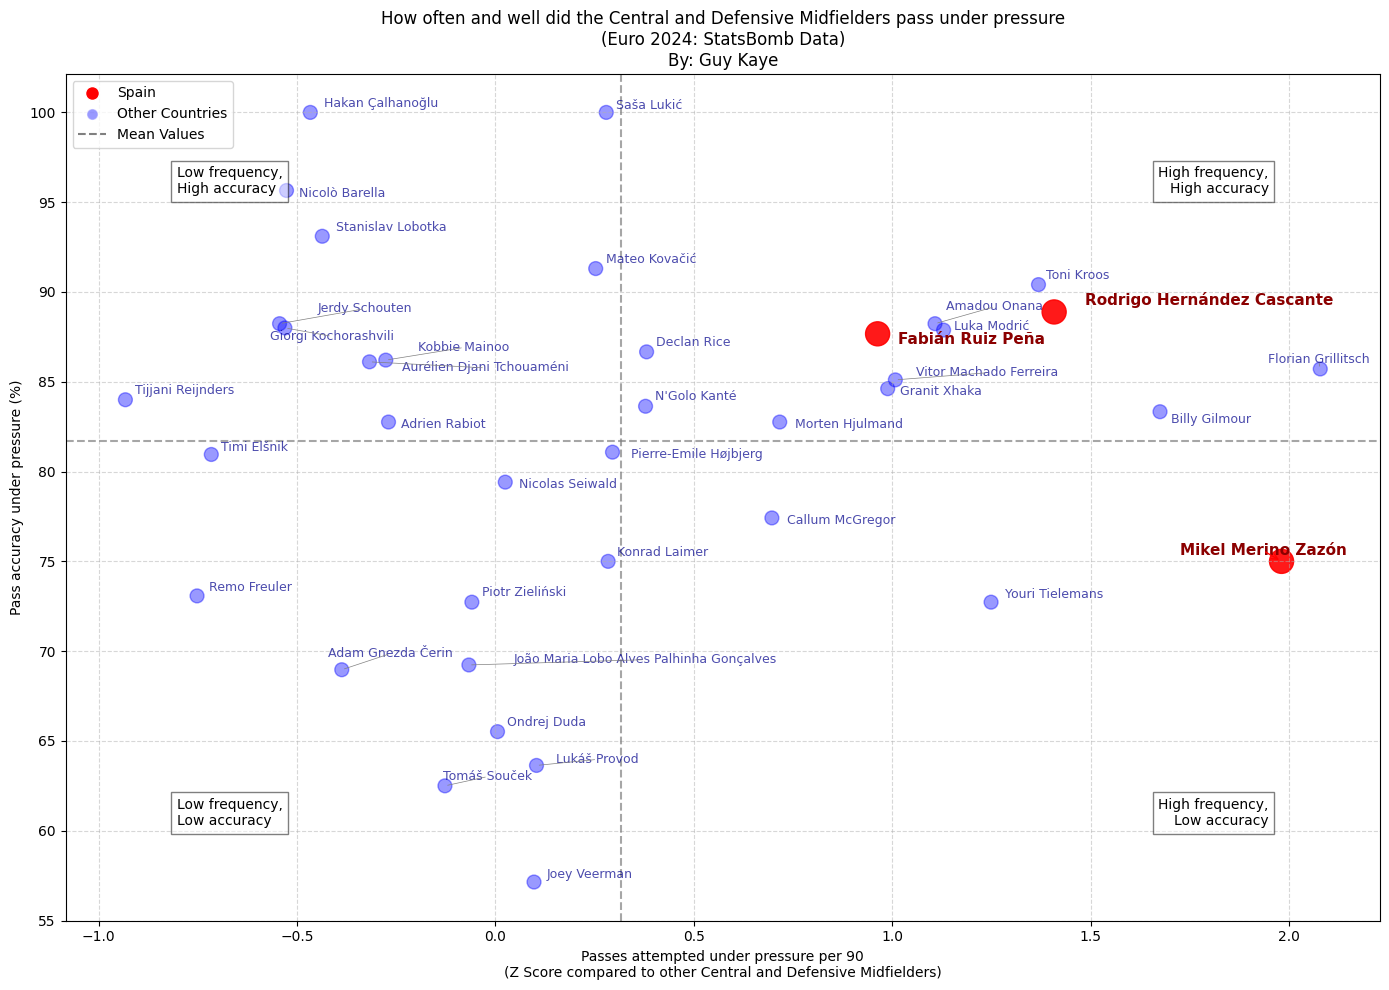

In [291]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

# Create the scatter plot
plt.figure(figsize=(14, 10))

# Extract data
x = Pressured_Pass_df_filter['PP per 90 _zscore'].values
y = Pressured_Pass_df_filter['PP Rate'].values
labels = Pressured_Pass_df_filter['player'].values
teams = Pressured_Pass_df_filter['team'].values

# Create colors and sizes arrays
colors = ['red' if team == 'Spain' else 'blue' for team in teams]
sizes = [300 if team == 'Spain' else 100 for team in teams]
alphas = [0.9 if team == 'Spain' else 0.4 for team in teams]

# Create the scatter plot with varying colors, sizes, and transparency
scatter = plt.scatter(x, y, c=colors, s=sizes, alpha=alphas)

# Calculate mean values
x_mean = np.mean(x)
y_mean = np.mean(y)

# Add mean lines
plt.axvline(x=x_mean, color='gray', linestyle='--', alpha=0.7, label=f'Mean PP per 90 Z-score: {x_mean:.2f}')
plt.axhline(y=y_mean, color='gray', linestyle='--', alpha=0.7, label=f'Median PP Rate: {y_mean:.2f}')

# Separate texts for Spain and others for different styling and adjustment
spain_texts = []
other_texts = []

for i, (xi, yi, label, team) in enumerate(zip(x, y, labels, teams)):
    if team == 'Spain':
        t = plt.text(xi, yi, label, fontsize=11, fontweight='bold', color='darkred')
        spain_texts.append(t)
    else:
        t = plt.text(xi, yi, label, fontsize=9, color='darkblue', alpha=0.7)
        other_texts.append(t)

# Adjust Spain labels with different parameters for better visibility
adjust_text(spain_texts, 
            arrowprops=dict(arrowstyle='->', color='red', lw=1),
            expand_points=(2.0, 2.0),
            force_points=(0.2, 0.2))

# Adjust other labels
adjust_text(other_texts, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.1, 0.1))

# Add legend - moved to upper left to avoid annotation overlap
spain_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                        markersize=10, label='Spain')
other_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                        markersize=8, alpha=0.4, label='Other Countries')
mean_line = plt.Line2D([0], [0], color='gray', linestyle='--', label='Mean Values')

# Create legend with all elements - moved to upper left
plt.legend(handles=[spain_patch, other_patch, mean_line], loc='upper left')

# Set y-axis ticks to 5% increments
plt.yticks(np.arange(55, 105, 5))  # Adjust range as needed for your data

plt.xlabel('Passes attempted under pressure per 90\n(Z Score compared to other Central and Defensive Midfielders)')
plt.ylabel('Pass accuracy under pressure (%)')
plt.title('How often and well did the Central and Defensive Midfielders pass under pressure\n(Euro 2024: StatsBomb Data)\nBy: Guy Kaye')
plt.grid(True, linestyle='--', alpha=0.5)

# Add quadrant labels based on mean lines
plt.text(x.max() - 0.13, y.max() - 3, 'High frequency,\nHigh accuracy', 
         ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(x.min() + 0.13, y.max() - 3, 'Low frequency,\nHigh accuracy', 
         ha='left', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(x.max() - 0.13, y.min() + 3, 'High frequency,\nLow accuracy', 
         ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(x.min() + 0.13, y.min() + 3, 'Low frequency,\nLow accuracy', 
         ha='left', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.savefig('plot2.pdf')
plt.show()